# <font color="purple"> Week4, Assignment 4, Association and Clustering</font>
**Submission guideline:** <br>
    Due on 2/9/2022 (Wednesday) at 11:00pm (10% of total grade) on Discussions and Assignments. This assignment will have three parts. 
    
* All Parts are submitted in ONE “.ipynb” extension file to Brightspace “Assignment 4. **You should rename the file as "504 W4 Assignment4_LastName_FirstName.ipynb"**. 
* For each subsection, you should insert one or more cells  to write proper Python Codes in 'Code' mode for each sub-question with proper comments that explain your codesand or 'Markdown' for extra instructions/explanations. 
* If your submission include some extra files (e.g, data files or images files), please zip them together and save as **"504 W4 Assignment4_LastName_FirstName.zip"**.
* When I say **"please use python codes ..."**, it means **the basic python functions and all libraries that you may need to import.** 

**Grading Criteria:** 
 
* There are many ways to do the same thing, your python codes should not be too lengthy. **Remember to provide Comments in your Python codes.**
* Each part is separated into small sections, which I will give you rough tips on what you should do. Students are asked to do one or more cells of codings (depending on how you arrange your codes) for each section. 
* Some python codes (like array.head(), print(), ....) are used for your understanding and you are free to use them. **You can leave those codes in the cells.** Even if you may not be able to do the codings correctly and get the right results, those codes may earn you partial credits for your work.
* For each part: 
    * **Coding parts is 80% of this grade.** Correctness in your answers and your Python coding correctness will determines your score in this part. You can do it in one cell or multiple continuous cells for each sub-question.
    * **Comments and 'Markdown' parts is 20% of this grade**. Without proper comments in each cell, you will receive zero in this part. 

# <font color="purple">Please insert libraries and module here</font>

In [1]:
# import necessary libraries

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from mlxtend.frequent_patterns import association_rules, apriori
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# <font color="purple">Part. 1 Supermarket Purchases</font>

In this example, you have the purchasing history in the grocery items from a supermarket with 6951 purchasing receipts. This dataset includes data from **five regions: 'East', 'South', 'Midwest' and 'Mountain' and 'West'**.

You are asked to use **apriori** and **association_rules** from **mlxtend.frequent_patterns** model to do the  model fitting. There is no cleaning work to do for this dataset. You are asked to derive some **association rules** that can help the cable company to upsell their channels. 

# <font color="purple">Q1.1 Load data and separate into 5 smaller datasets (30%)</font>

* Please import **Supermarket.csv** and separate them into five Pandas DataFrames for later analysis
* After separating into five datasets, please drop the region variable.

In [2]:
# read the dataset
df = pd.read_csv('Supermarket.csv')

In [3]:
# get unique regions
df['Region'].unique()

array(['Midwest', 'South', 'East', 'Mountain', 'West'], dtype=object)

In [4]:
# get 5 different dataframe based on regions

df_east = df[df['Region'] =='East']
df_Midwest = df[df['Region'] =='Midwest']
df_Mountain = df[df['Region'] =='Mountain']
df_South = df[df['Region'] =='South']
df_West = df[df['Region'] =='West']

# drop region column from all these dataframe
df_east.drop('Region',inplace=True,axis=1)
df_Midwest.drop('Region',inplace=True,axis=1)
df_Mountain.drop('Region',inplace=True,axis=1)
df_South.drop('Region',inplace=True,axis=1)
df_West.drop('Region',inplace=True,axis=1)

# <font color="purple">Q1.2 Apply **apriori** and **association_rules** and find out the rules</font>

For each region, pleasease do the followings:
* Please apply **apriori** module with a minimal support of 0.05
* Please find the association rules for each region with the condition:
    * metric is choosing 'lift with a minimal threshold of 2
* Please display all association rules that you have found for 'East' region

In [5]:
# Apply apriori module
frequent_items = apriori(df_east, min_support = 0.05,use_colnames = True)

# now making the rules from frequent itemset generated above
rules_east = association_rules(frequent_items, metric = "lift", min_threshold = 2)

# sort rules_east based on confidence
rules_east.sort_values('confidence', ascending=False,inplace=True)
rules_east

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
161,"(Butter, Cauliflower)",(Sugar),0.073996,0.424947,0.073291,0.990476,2.330822,0.041847,60.380550
1227,"(Yeast, Butter, Cauliflower)",(Sugar),0.066949,0.424947,0.066244,0.989474,2.328463,0.037794,54.630021
1193,"(Cauliflower, Butter, Grapes)",(Sugar),0.055673,0.424947,0.054968,0.987342,2.323446,0.031310,45.429175
1059,"(Flour, Butter, Cauliflower)",(Sugar),0.055673,0.424947,0.054968,0.987342,2.323446,0.031310,45.429175
829,"(Cauliflower, Butter, Sour Cream)",(Sugar),0.054264,0.424947,0.053559,0.987013,2.322672,0.030500,44.279070
...,...,...,...,...,...,...,...,...,...
1029,(Yeast),"(Flour, Butter, Cauliflower)",0.453136,0.055673,0.050740,0.111975,2.011300,0.025513,1.063401
3518,(Yeast),"(Cauliflower, Butter, Sugar, Grapes)",0.453136,0.054968,0.050740,0.111975,2.037086,0.025832,1.064195
807,(Yeast),"(Cauliflower, Butter, Sour Cream)",0.453136,0.054264,0.050035,0.110420,2.034881,0.025446,1.063127
3344,(Yeast),"(Flour, Butter, Sugar, Cauliflower)",0.453136,0.054968,0.050035,0.110420,2.008793,0.025127,1.062335


In [6]:
# Apply apriori module
frequent_items = apriori(df_Midwest, min_support = 0.05,use_colnames = True)

# now making the rules from frequent itemset generated above
rules_Midwest = association_rules(frequent_items, metric = "lift", min_threshold = 2)

# sort rules_east based on confidence
rules_Midwest.sort_values('confidence', ascending=False,inplace=True)
rules_Midwest

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2406,"(Yeast, Paprika, Grapes, Sour Cream)",(Sugar),0.050773,0.433407,0.050773,1.000000,2.307301,0.028767,inf
2270,"(Yeast, Cauliflower, Butter, Grapes)",(Sugar),0.050773,0.433407,0.050773,1.000000,2.307301,0.028767,inf
2180,"(Flour, Cauliflower, Butter, Grapes)",(Sugar),0.050037,0.433407,0.050037,1.000000,2.307301,0.028351,inf
497,"(Cauliflower, Margarine, Grapes)",(Sugar),0.058131,0.433407,0.058131,1.000000,2.307301,0.032937,inf
896,"(Corn, Butter, Grapes)",(Sugar),0.052980,0.433407,0.052980,1.000000,2.307301,0.030018,inf
...,...,...,...,...,...,...,...,...,...
1719,(Sugar),"(Grapes, Margarine, Peas, Sour Cream)",0.433407,0.058131,0.050773,0.117148,2.015237,0.025578,1.066848
1120,(Sugar),"(Cilantro, Flour, Cauliflower)",0.433407,0.051508,0.050037,0.115450,2.241378,0.027713,1.072287
2961,(Sugar),"(Cilantro, Sour Cream, Yeast, Grapes, Butter)",0.433407,0.053716,0.050037,0.115450,2.149266,0.026756,1.069791
2205,(Sugar),"(Flour, Cauliflower, Butter, Grapes)",0.433407,0.050037,0.050037,0.115450,2.307301,0.028351,1.073951


In [7]:
# Apply apriori module
frequent_items = apriori(df_Mountain, min_support = 0.05,use_colnames = True)

# now making the rules from frequent itemset generated above
rules_Mountain = association_rules(frequent_items, metric = "lift", min_threshold = 2)

# sort rules_east based on confidence
rules_Mountain.sort_values('confidence', ascending=False,inplace=True)
rules_Mountain

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2722,"(Flour, Cauliflower, Butter, Grapes)",(Sugar),0.053701,0.441945,0.053701,1.0000,2.262726,0.029968,inf
2120,"(Yeast, Paprika, Margarine, Sour Cream)",(Sugar),0.051524,0.441945,0.051524,1.0000,2.262726,0.028753,inf
985,"(Flour, Butter, Cauliflower)",(Sugar),0.067489,0.441945,0.067489,1.0000,2.262726,0.037663,inf
1598,"(Yeast, Corn, Grapes)",(Sugar),0.060958,0.441945,0.060958,1.0000,2.262726,0.034018,inf
674,"(Corn, Margarine, Grapes)",(Sugar),0.054427,0.441945,0.054427,1.0000,2.262726,0.030373,inf
...,...,...,...,...,...,...,...,...,...
912,(Sugar),"(Mushroom, Butter, Cauliflower)",0.441945,0.051524,0.050073,0.1133,2.198987,0.027302,1.069670
1616,(Sugar),"(Cauliflower, Peas, Grapes)",0.441945,0.050798,0.050073,0.1133,2.230401,0.027623,1.070489
1430,(Sugar),"(Yeast, Mushroom, Cauliflower)",0.441945,0.052250,0.050073,0.1133,2.168446,0.026981,1.068852
3461,(Sugar),"(Flour, Yeast, Grapes, Margarine, Peas)",0.441945,0.052975,0.050073,0.1133,2.138741,0.026660,1.068033


In [8]:
# Apply apriori module
frequent_items = apriori(df_South, min_support = 0.05,use_colnames = True)

# now making the rules from frequent itemset generated above
rules_South = association_rules(frequent_items, metric = "lift", min_threshold = 2)

# sort rules_east based on confidence
rules_South.sort_values('confidence', ascending=False,inplace=True)
rules_South

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4086,"(Flour, Sour Cream, Grapes, Margarine, Butter)",(Sugar),0.062500,0.457122,0.061773,0.988372,2.162162,0.033203,46.687500
510,"(Corn, Margarine, Sour Cream)",(Sugar),0.051599,0.457122,0.050872,0.985915,2.156788,0.027285,38.544331
703,"(Cauliflower, Margarine, Grapes)",(Sugar),0.061773,0.457122,0.060320,0.976471,2.136126,0.032082,23.072311
723,"(Yeast, Margarine, Cauliflower)",(Sugar),0.066134,0.457122,0.063953,0.967033,2.115481,0.033722,16.467297
4286,"(Sour Cream, Yeast, Grapes, Margarine, Butter)",(Sugar),0.065407,0.457122,0.063227,0.966667,2.114679,0.033328,16.286337
...,...,...,...,...,...,...,...,...,...
4239,(Sugar),"(Cilantro, Sour Cream, Grapes, Margarine, Butter)",0.457122,0.054506,0.050872,0.111288,2.041759,0.025956,1.063892
2507,(Sugar),"(Cilantro, Flour, Margarine, Paprika)",0.457122,0.054506,0.050872,0.111288,2.041759,0.025956,1.063892
5249,(Sugar),"(Sour Cream, Yeast, Grapes, Butter, Peas)",0.457122,0.054506,0.050145,0.109698,2.012591,0.025230,1.061993
1791,(Sugar),"(Grapes, Margarine, Butter, Mushroom)",0.457122,0.053779,0.050145,0.109698,2.039789,0.025562,1.062809


In [9]:
# Apply apriori module
frequent_items = apriori(df_West, min_support = 0.05,use_colnames = True)

# now making the rules from frequent itemset generated above
rules_West = association_rules(frequent_items, metric = "lift", min_threshold = 2)

# sort rules_east based on confidence
rules_West.sort_values('confidence', ascending=False,inplace=True)
rules_West

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1370,"(Yeast, Corn, Butter)",(Sugar),0.073291,0.454545,0.072586,0.990385,2.178846,0.039272,56.727273
1209,"(Flour, Butter, Cauliflower)",(Sugar),0.065539,0.454545,0.064834,0.989247,2.176344,0.035044,50.727273
3898,"(Yeast, Corn, Flour, Butter)",(Sugar),0.059901,0.454545,0.059197,0.988235,2.174118,0.031969,46.363636
3872,"(Yeast, Flour, Butter, Cauliflower)",(Sugar),0.057787,0.454545,0.057082,0.987805,2.173171,0.030816,44.727273
3528,"(Yeast, Corn, Butter, Sour Cream)",(Sugar),0.055673,0.454545,0.054968,0.987342,2.172152,0.029662,43.090909
...,...,...,...,...,...,...,...,...,...
1848,(Sugar),"(Yeast, Cauliflower, Peas)",0.454545,0.052854,0.050035,0.110078,2.082667,0.026011,1.064302
6043,(Sugar),"(Flour, Sour Cream, Yeast, Grapes, Peas)",0.454545,0.054264,0.050035,0.110078,2.028571,0.025370,1.062718
3085,(Sugar),"(Cilantro, Paprika, Margarine, Yeast)",0.454545,0.052854,0.050035,0.110078,2.082667,0.026011,1.064302
5505,(Sugar),"(Sour Cream, Yeast, Grapes, Margarine, Peas)",0.454545,0.054264,0.050035,0.110078,2.028571,0.025370,1.062718


# <font color="purple">Q1.3 Narrowing down the best association rules</font>

For each region, pleasease do the followings:
* For each region, please use python's logical condition to find the association rules that fulfill these three conditions: 
    * lift is no smaller than 1.5, 
    * support is no smaller than 0.14
    * conviction is no smaller than 1.5
* Do you find some commonality among these five regions? If not, what is the most commonality shared by what regions? 
* What region do you think have the most unique purchasing behavior compared to other regions? Explain with your reasons 

In [10]:
# filer the association rules based on the given conditions
rules_east[(rules_east['lift']>=1.5) & (rules_east['support']>=0.14) & (rules_east['conviction']>=1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
150,"(Yeast, Butter)",(Sugar),0.180409,0.424947,0.156448,0.867187,2.040695,0.079784,4.329810
152,(Butter),"(Yeast, Sugar)",0.260042,0.264271,0.156448,0.601626,2.276553,0.087727,1.846831
151,"(Yeast, Sugar)",(Butter),0.264271,0.260042,0.156448,0.592000,2.276553,0.087727,1.813622
141,(Butter),"(Sugar, Grapes)",0.260042,0.261452,0.142354,0.547425,2.093792,0.074365,1.631882
113,(Butter),"(Flour, Sugar)",0.260042,0.267794,0.141649,0.544715,2.034082,0.072011,1.608238
140,"(Sugar, Grapes)",(Butter),0.261452,0.260042,0.142354,0.544474,2.093792,0.074365,1.624404
112,"(Flour, Sugar)",(Butter),0.267794,0.260042,0.141649,0.528947,2.034082,0.072011,1.570860


In [11]:
# filer the association rules based on the given conditions
rules_Midwest[(rules_Midwest['lift']>=1.5) & (rules_Midwest['support']>=0.14) & (rules_Midwest['conviction']>=1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
144,"(Yeast, Sugar)",(Butter),0.251656,0.281825,0.149375,0.593567,2.106156,0.078452,1.767021
134,"(Sugar, Grapes)",(Butter),0.258278,0.281825,0.148639,0.575499,2.042043,0.075849,1.691809
145,(Butter),"(Yeast, Sugar)",0.281825,0.251656,0.149375,0.530026,2.106156,0.078452,1.592311
135,(Butter),"(Sugar, Grapes)",0.281825,0.258278,0.148639,0.527415,2.042043,0.075849,1.569500


In [12]:
# filer the association rules based on the given conditions
rules_Mountain[(rules_Mountain['lift']>=1.5) & (rules_Mountain['support']>=0.14) & (rules_Mountain['conviction']>=1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
152,"(Yeast, Sugar)",(Butter),0.251089,0.266328,0.140784,0.560694,2.105275,0.073912,1.670069
142,"(Sugar, Grapes)",(Butter),0.259797,0.266328,0.142961,0.550279,2.066171,0.073770,1.631395
143,(Butter),"(Sugar, Grapes)",0.266328,0.259797,0.142961,0.536785,2.066171,0.073770,1.597968
153,(Butter),"(Yeast, Sugar)",0.266328,0.251089,0.140784,0.528610,2.105275,0.073912,1.588731


In [13]:
# filer the association rules based on the given conditions
rules_South[(rules_South['lift']>=1.5) & (rules_South['support']>=0.14) & (rules_South['conviction']>=1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
138,"(Yeast, Sugar)",(Butter),0.276163,0.290698,0.162064,0.586842,2.018737,0.081784,1.716783
139,(Butter),"(Yeast, Sugar)",0.290698,0.276163,0.162064,0.557500,2.018737,0.081784,1.635790


In [14]:
# filer the association rules based on the given conditions
rules_West[(rules_West['lift']>=1.5) & (rules_West['support']>=0.14) & (rules_West['conviction']>=1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,"(Margarine, Sugar)",(Butter),0.248767,0.283298,0.152220,0.611898,2.159909,0.081745,1.846684
144,"(Yeast, Sugar)",(Butter),0.274137,0.283298,0.164200,0.598972,2.114281,0.086538,1.787161
74,"(Sugar, Sour Cream)",(Butter),0.236786,0.283298,0.140240,0.592262,2.090596,0.073158,1.757751
145,(Butter),"(Yeast, Sugar)",0.283298,0.274137,0.164200,0.579602,2.114281,0.086538,1.726610
134,"(Sugar, Grapes)",(Butter),0.279774,0.283298,0.159267,0.569270,2.009436,0.080008,1.663922
135,(Butter),"(Sugar, Grapes)",0.283298,0.279774,0.159267,0.562189,2.009436,0.080008,1.645061
29,(Butter),"(Margarine, Sugar)",0.283298,0.248767,0.152220,0.537313,2.159909,0.081745,1.623633
75,(Butter),"(Sugar, Sour Cream)",0.283298,0.236786,0.140240,0.495025,2.090596,0.073158,1.511388


(Sugar, Yeast) comes together in all the regions with good confidence.Also, Midwest,Mountain and south regions having highest confidence for these items as per given conditions.

East regions have variety of mixed purchasing behavior with enough confidence

# <font color="purple">Q1.4 Conclude the association rules you found</font>

* Do you find some commonality among these five regions? If not, what is the most commonality rule shared by what regions? 
* What are the regions that you may not find any commonality rules? Can you adjust the support to 0.13 in that region and see what happens.
* After such adjustments, do you find some commonality among these five regions? If yes, what are they?

# Ans:-
1.  (Sugar, Yeast) comes together in all the regions with good confidence.Also, Midwest,Mountain and south regions having highest confidence for these items as per given conditions.

2. i can find commonality among all these regions based on associations rules

# <font color="purple">Q1.5 How can you utilize the association rules you have found?</font>

* From the exercises above, if you were the Marketing director, how could you utilize the association rules you have found?

# Ans:-
- I will keep Associated item near to each other in my Shop/Mall
- I will give discount on items if associated items to be purchased together
- I will increase the inventory or associated items during festive season.

# <font color="purple">Part. 2 Patient Clustering (50%)</font>
 
In this example, you given a dataset **DiabetesPatient.xlsx** with 459 diabetes patients. The hospital would like to see whether they can separate them into several clusters such that they can have better understand the characteristics of the patients. You should use **sklearn.cluster KMeans module** and **MinMaxScaler module** from **sklearn.preprocessing** to acoomplish this assignment. 


#  <font color="purple">Q2.1 Load the data and drop categorical variables</font>

In this section, you are asked to: 
* Read the Excel data **DiabetesPatient.xlsx**
* Drop variables that are not suitable for this analysis


In [15]:
# read the dataset
df = pd.read_excel('DiabetesPatient.xlsx')

In [16]:
df.head() # display few rows

,Patient ID,age,bmi,RaceID,Glucose,Cholesterol,smoker,Average Heartbeat,Daily Steps
0,3,36,29.920,1,87,287,0,68,466
1,10,23,36.670,2,118,232,1,88,4218
2,19,51,36.385,3,62,124,0,89,829
3,64,38,30.210,3,108,162,0,76,1421
4,140,22,28.050,0,102,139,0,86,2684


In [17]:
df.dtypes # get datatypes

Patient ID             int64
age                    int64
bmi                  float64
RaceID                 int64
Glucose                int64
Cholesterol            int64
smoker                 int64
Average Heartbeat      int64
Daily Steps            int64
dtype: object

In [18]:
# drop Patient ID','RaceID' columns
df.drop(['Patient ID','RaceID'],axis=1,inplace=True)

In [19]:
df.head()

,age,bmi,Glucose,Cholesterol,smoker,Average Heartbeat,Daily Steps
0,36,29.920,87,287,0,68,466
1,23,36.670,118,232,1,88,4218
2,51,36.385,62,124,0,89,829
3,38,30.210,108,162,0,76,1421
4,22,28.050,102,139,0,86,2684


#  <font color="purple">Q2.2 Scalar transformation the data</font>

After loading the data, you should do scalar transformation on the axis of X variables by using **MinMaxScaler()** from **sklearn.preprocessing**.  

In this section, you should demonstrate how to: 
* Rescale (using MinMaxScaler()) all X variables and replace the original values


In [20]:
# get X 
X = df.iloc[:].values

# perform minmax scaling
scale = MinMaxScaler()
X = scale.fit_transform(X)

In [21]:
X

array([[0.39130435, 0.40557815, 0.38571429, ..., 0.        , 0.35294118,
        0.06127748],
       [0.10869565, 0.60168507, 0.82857143, ..., 1.        , 0.94117647,
        0.71074952],
       [0.7173913 , 0.593405  , 0.02857143, ..., 0.        , 0.97058824,
        0.12411286],
       ...,
       [0.30434783, 0.34500291, 0.31428571, ..., 0.        , 0.08823529,
        0.01731002],
       [0.08695652, 0.44712377, 0.1       , ..., 0.        , 0.76470588,
        0.08204951],
       [0.97826087, 0.26496223, 0.98571429, ..., 0.        , 0.17647059,
        0.18504414]])

#  <font color="purple">Q2.3 KMeans Clustering</font>

After rescaling all X variable, you should do the followings:

* use the **KMeans** module from **sklearn.clustering** and choose **K=4 clusters** for this operation.
* Add cluster # as 'cluster' variable in the DataFrame
* Display the sum of squared error of samples from their closest cluster center
* Please use **matplotlib.pyplot** to plot data clusters in separate colors in a 2D plane of **Daily Steps** and **Average Heartbeat**. Please label X-axis and Y-asix. Plot the scatterplots and save the output figures 
* Please wrie codes that can **save that cluster scatter plot into an image file, names as "PatientCluster_YourLastName.png")**

In [22]:
# build kmeans model
kmeans = KMeans(n_clusters = 4, random_state = 42)

# fit and predict on X
y_kmeans = kmeans.fit_predict(X)

In [23]:
# create a new column and store cluster numbers
df['cluster'] = y_kmeans

In [24]:
df.head()

,age,bmi,Glucose,Cholesterol,smoker,Average Heartbeat,Daily Steps,cluster
0,36,29.920,87,287,0,68,466,1
1,23,36.670,118,232,1,88,4218,0
2,51,36.385,62,124,0,89,829,3
3,38,30.210,108,162,0,76,1421,2
4,22,28.050,102,139,0,86,2684,2


In [25]:
# sse
kmeans.inertia_

144.206717019971

In [26]:
kmeans.cluster_centers_[:,6]

array([0.19060783, 0.07430672, 0.50712105, 0.16273102])

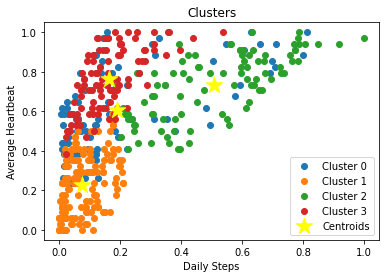

In [27]:
# scatter plot
for i in range(4):
    lbl = 'Cluster '+str(i)
    plt.scatter(X[y_kmeans == i, 6], X[y_kmeans == i, 5], label = lbl)

# plot centroid
plt.scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:, 5],c = 'yellow',s = 300,marker='*' , label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Daily Steps')
plt.ylabel('Average Heartbeat')
plt.legend()
plt.savefig('PatientCluster_Redendo.png')
plt.show()


#  <font color="purple">Q2.4 Elbow Test</font>

Please conduct an Elbow test when clustering  **PatientCluster.xlsx** and find out the optimal number of cluster. You should do the following:
* Create a empty python list 'sse' to store the SSE (Sum of Square Errors) at different K
* Create a for loop that have K runs in a range from 1 to 10.
* Run Kmeans clustering fit for a different K (K=1-10)
* Append the cluster outcome inertia_ (SSE) to the sse list
* Use matplotlib.pyplot.plot to plot the SSEs for different K in a line graphs. Please label x-axis and y-axis.

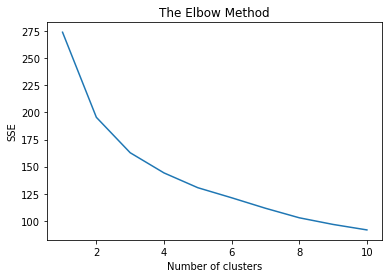

In [28]:
sse = []

# iterate through 1 to 10 and store sse in sse list
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
# plot the graph
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#  <font color="purple">Q2.5 Conclusion from the Elbow Test</font>

From the line graph of your Elbow test, can you conclude what is your optimal # of clustering? Please answer it in a "Markdown" cell

In [29]:
# get the number of cluster having least sse
sse.index(min(sse))+1

10

10

#  <font color="purple">Q2.6 Re-Clustering with your optimal K</font>

Please use **your Optimal K number that you concluded in Q2.5 and repeat all the operations you have done in** <font color="purple">**Q2.3**</font> and replot the clustering outcomes. 

* use the **KMeans** module from **sklearn.clustering** and choose **K=your Optimal K clusters** for this operation.
* Add cluster # as 'cluster' variable in the DataFrame
* Display the sum of squared error of samples from their closest cluster center
* Replot the scatterplots and save the output figures
* Please use **matplotlib.pyplot** to plot data clusters in separate colors in a 2D plane of **Median Age** and **Median Income**. Please label the Plot title, X-axis and Y-asix. 
* Please wrie codes that can **save that cluster scatter plot into an image file, names as "BankCluster_Optimal_YourLast.png")**

In [30]:
# build the kmeans based on optimal cluster number
kmeans = KMeans(n_clusters = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['cluster'] = y_kmeans

In [31]:
df

,age,bmi,Glucose,Cholesterol,smoker,Average Heartbeat,Daily Steps,cluster
0,36,29.920,87,287,0,68,466,6
1,23,36.670,118,232,1,88,4218,5
2,51,36.385,62,124,0,89,829,0
3,38,30.210,108,162,0,76,1421,0
4,22,28.050,102,139,0,86,2684,2
...,...,...,...,...,...,...,...,...
454,53,35.900,66,211,0,89,973,3
455,41,37.050,80,145,0,68,352,0
456,32,27.835,82,129,0,59,212,0
457,22,31.350,67,199,0,82,586,4


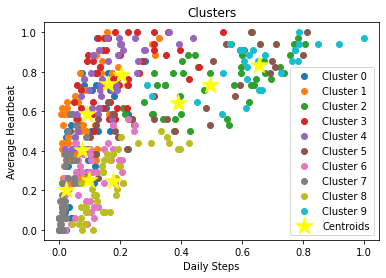

In [32]:
# scatter plot

for i in range(10):
    lbl = 'Cluster '+str(i)
    plt.scatter(X[y_kmeans == i, 6], X[y_kmeans == i, 5], label = lbl)

plt.scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:, 5], s = 300,marker='*' ,c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Daily Steps')
plt.ylabel('Average Heartbeat')
plt.legend()
plt.savefig('BankCluster_Optimal_Redendo.png')
plt.show()


# <font color="purple"> Part 3, How you can apply analytics to improve business sales/profit? (20%)</font>

"Associations are good at collecting data, but they’re less adept at analyzing it or knowing what to do with the gold mine of information they have. But that’s changing. As technology becomes more affordable, organizations are harnessing “big data” to improve member engagement.
 ---- By Melanie D.G. Kaplan"  
 
As a consumer in the sociaty, you are aware that your information are collected when you use Internet from your computer or smartphone, or even just using your credit cards (transaction records) or just carrying your smartphone (GPS and app tracking). As a worker for your employers, you are aware of tons of informations are collected. 

As a data analyst, your job is to help your organization to improve its revenue/sales/profit through data mining. Now you have learned three major topics (Regression, associatiions & clustering, classifications). Please use "Markdown" to write  <font color="blue">a 800-1000 word essay</font> **assuming you were an executive of your organization, how will you do help your organization to improve its performances?**

You will need to specify in your writing,
* What datasets you will be focus on? 
* What organizational goals or key performance indices will your proposal improve? 
* Which analytics tools do you plan to use to achieve such a goal? 
* How will that analytics help your organization to improve its performance? 



# Ans:-
- historical sales dataset
- revenue, customer attention and comfort
- python Machine learning and be used
- based on apriori , frequent itemset can be decided and hence kept nearby in shopping Mall
- based on historical increase in sales during festive season , we can forecast the future demand (regression) and accordingly keep the inventory full
- Based on clustering , we can decide which item customers are more likely to buy together, the same also be decided by apriori. hence decision from both the model to be considered while making business decisions